# Kaplan Meier Model

## main output

- median

- KM_estimate, 
    
    - surviving time beyond x month, is 0.7333%

    - we have 95% confident that some unit between lower% to upper% chance is surviving beyond x month

## notice: 

10:34 seems some are different with the R software
want to check with minitab mode

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.75 0.03      5.10


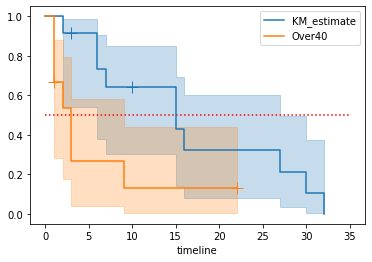

In [90]:
%matplotlib inline
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
df_orgi = pd.read_csv('survival_data.csv')
# time col means month, survival month; death col 1 means failure, 0 means right censor

# ========= df do not have group ================
df = df_orgi.loc[df_orgi['Over40'] == 0, ]
kmf = KaplanMeierFitter()
kmf.fit(df['Time'], df['Death'])
# print (kmf.survival_function_)
kmf_sur_summary = kmf.survival_function_.copy()
kmf_sur_summary['n_event'] = [0, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1] # this is the event occur during time
sum_test = kmf_sur_summary.loc[kmf_sur_summary['n_event'] != 0, ].copy()
km_est = 'KM_estimate'
eve = 'n_event'
sum_test['std.err'] = sum_test[km_est]/(sum_test[eve] ** .5)

# print ('median is {};\ninterval is{}'.format(kmf.median_survival_time_, kmf.confidence_interval_survival_function_))



plt.hlines(y = .5, xmin = 0, xmax = 35, color = 'r', linestyle = 'dotted')

kmf.plot(ci_show = True, show_censors = True)
kmf.confidence_interval_survival_function_

# ========= df do have group ================
# df40 = df_orgi.loc[df['Over40'] == 1, ]
df40 = df_orgi.loc[df_orgi['Over40'] == 1, ]
kmf40 = KaplanMeierFitter(label = 'Over40')
kmf40.fit(df40['Time'], df40['Death'])
kmf40.plot(ci_show = True, show_censors = True)

# ========== compare two ====================
# H0: surv in two groups is same
# Ha: surv is not 
from lifelines.statistics import logrank_test
results = logrank_test(df['Time'], df40['Time'], event_observed_A= df['Death'], event_observed_B = df40['Death'])
results.print_summary(style = 'ascii')
print ('due to the small P value, we can reject our null hypothesis, we have the evidence to believe that sur is not the same depending on if you over 40/ or the sur depends if one is over 40')
# log-rank-test to see if two groups are significantly different 

/usr/local/lib/python3.6/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           5.43 0.02      5.66
due to the small P value, we can reject our null hypothesis, we have the evidence to believe that sur is not the same depending on if you over 40/ or the sur depends if one is over 40


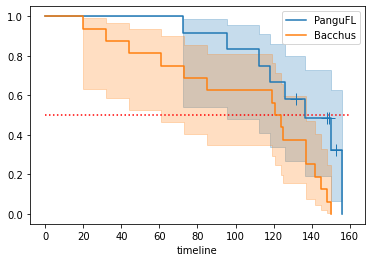

In [29]:
# this is from real data
import pandas as pd
import matplotlib.pyplot as plt

fl_name = 'results.xlsx'
df = pd.read_excel(fl_name, sheet_name = 'data')
# xl = pd.ExcelFile(fl_name)
# print (xl.sheet_names)
test = 'test_name'
unit_id = 'unit_id'
unit = 'unit'
power = 'power_change'
test_data = 'data'
dead = 'dead'
try_out = 'try out?'
# print (df.columns)
motor_life_df = df.loc[df[test] == 'motor_life', ]
motor_life_cols = [unit_id, unit, power, test_data, test, try_out]
motor_life_df = motor_life_df[motor_life_cols]
motor_life_df[dead] = 1
motor_life_df.loc[motor_life_df[try_out] == 'alive', dead] = 0
motor_life_df['project'] = 'panguFL'
pg_df = motor_life_df[[test_data, dead, 'project']]

h_df = pd.read_excel('harry_survival.xlsx')
h_df['sample'] = h_df['sample'].astype(str)
h_df['unit'] = h_df['project'] +'_'+h_df['tm'] + '_'+h_df['sample']
# h_df['unit'] = h_df.apply(lambda x: x['unit'] + str(x['sample']))
# h_df['unit'] = h_df.apply(lambda x: '{}_{}'.format(x['project'], x['sample']))
bcs_df = h_df[['time(hr)', 'event', 'project']]

# from lifelines import KaplanMeierFitter

# kmf = KaplanMeierFitter()
# kmf.fit(motor_life_df[test_data], motor_life_df[dead])
# # print (kmf.survival_function_)
# kmf_sur_summary = kmf.survival_function_.copy()
# print (kmf_sur_summary)
# kmf_sur_summary['n_event'] = [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

# sum_test = kmf_sur_summary.loc[kmf_sur_summary['n_event'] != 0, ].copy()
# km_est = 'KM_estimate'
# eve = 'n_event'
# sum_test['std.err'] = sum_test[km_est]/(sum_test[eve] ** .5)

# # print ('median is {};\ninterval is{}'.format(kmf.median_survival_time_, kmf.confidence_interval_survival_function_))

# fig, axes = plt.subplots()
# axes = kmf.plot(ci_show = True, show_censors = True)
# # axes.axhline(y = .5, xmin = 0, xmax = kmf.median_survival_time_, color = 'r')
# plt.hlines(y = .5, xmin = 0, xmax = kmf.median_survival_time_, color = 'r', linestyles= 'dotted')
# plt.vlines(x = kmf.median_survival_time_, ymin = 0, ymax = .5, color = 'r', linestyles = 'dotted')

# print ('half engines life would shorter than {:.2f}, and half engines life would beyond {:.2f}'.format(kmf.median_survival_time_, kmf.median_survival_time_))
# kmf.confidence_interval_survival_function_


%matplotlib inline
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt


kmf_pg = KaplanMeierFitter(label = 'PanguFL')
kmf_pg.fit(pg_df[test_data], pg_df[dead])
kmf_pg.plot(ci_show = True, show_censors = True)

kmf_bcs = KaplanMeierFitter(label = 'Bacchus')
kmf_bcs.fit(bcs_df['time(hr)'], bcs_df['event'])
kmf_bcs.plot(ci_show = True, show_censors = True)

plt.hlines(y = .5, xmin = 0, xmax = 160, color = 'r', linestyle = 'dotted')

# ========== compare two ====================
# H0: surv in two groups is same
# Ha: surv is not 
from lifelines.statistics import logrank_test
results = logrank_test(pg_df[test_data], bcs_df['time(hr)'], event_observed_A= pg_df[dead], event_observed_B = bcs_df['event'])
results.print_summary(style = 'ascii')
print ('due to the small P value, we can reject our null hypothesis, we have the evidence to believe that sur is not the same depending on if you over 40/ or the sur depends if one is over 40')



[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

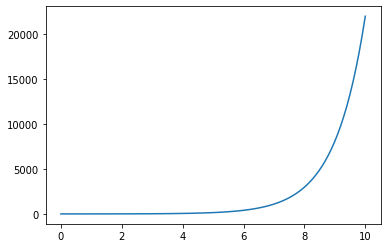

In [60]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
data = np.linspace(0, 10, 100)
a = np.exp(data)
print (data)
plt.plot(data, a)

# cox proportional hazards model understand

- explanation of cox ph table

    - exp(coef): 
        
        - [category] at a given instant in time, someone who is over 40 is 1.68 times (or 68% times) as likely to die as someone who is under 40 adjusting for mistach level (this is youtube example)

        - [numeric] at a given instant in time, the probability of dying for someone who is 1 year older is 3% higher than someone who is 1 year younger adjusting for t5 score. 
    
    - exp(-coef): 
        
        - this is special in Rstudio, the value is get from 1/exp(coef)
        
        - at a given instant in time, someone who is under 40 is .59 times as likely to die as someone who is over 40 adjusting for mismatch level 

    - concordance
        
        - fraction of percentage of the pairs of the obs which are concordant.

        - random guess, the data would be .5
        
- note: 

    - w/ category: 1. need to use get_dummies; 2. need to delete one dummies col, otherwise it would lead to error

- compare w/ R by rossi data (provided in the lifelines package): 

    - normalize data in the R 

        - command like: 

        `preproc1<- preProcess(stan2[, c(1, 4, 9)], method = c('center'))`

        - only normalize the continuous one, not normalize the category one which only have 0/ 1

- compare w/ youtube survival analysis

    - need to prepare the dataframe only with x, y, and factors; need to exclude other not related cols

    - `cox.mod<-coxph(Surv(duration_col,event_col)~factor1 + factor2 + factor3)`

In [16]:
import pandas as pd
import numpy as np

def f(x, first_point, sec_point):
    if x >= first_point and x <= sec_point: 
        myvalue = '1'
    elif x > sec_point:
        myvalue = '2'
    else:
        myvalue = '0'
    return myvalue

df = pd.read_csv('test.csv', sep = ';').iloc[:,1:]

# drop NaN
df.dropna(inplace = True)

# replace , in the last column; turn to number
df['t5'] = df['t5'].apply(lambda x: x.replace(',', '.'))
df['time'] = df['time'].apply(lambda x: x.replace(',', '.'))

# change to numeric
df[['t5', 'time']] = df[['t5', 'time']].apply(pd.to_numeric)

# add over40 col
df['over40'] = df['age'].apply(lambda x: '1' if x > 40 else '0')

# add mismatch level, divid into 3 part, lower is 0, middle is 1, higher is 2
# the following data is adjust according to the video info
first_point = df['t5'].quantile(1/3)
first_point = .9
sec_point = df['t5'].quantile(2/3)
sec_point = 1.4 


df['mismatchlevel'] = df.apply(lambda x: f(x['t5'], first_point, sec_point), axis = 1)

df = df[['id', 'time', 'status', 'age', 'over40', 't5', 'mismatchlevel']]
# df.to_csv('stan_2.csv', index = False)

# now data is ready here
df = pd.get_dummies(df, prefix = ['over40', 'mismatchlevel'])
cols = df.columns.to_list()
cols.remove('over40_0')
cols.remove('mismatchlevel_0')
df = df[cols]

check_cols = ['time', 'status', 'over40_1'] # , 'mismatchlevel_1', 'mismatchlevel_2'

# df1 and df2 is for the category data
df1 = df[check_cols]
df2 = df[['time', 'status', 'over40_1', 'mismatchlevel_1', 'mismatchlevel_2']]

# df3 and df4 is for the numeric data
df3 = df[['time', 'status', 'age', 't5']]


## Coxph category cal

In [205]:
# make sure the above data is ready
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

cph_1 = CoxPHFitter()
cph_1.fit(df1, duration_col = 'time', event_col = 'status')
# cph_1.print_summary(style = 'ascii')

cph_2 = CoxPHFitter()
cph_2.fit(df2, duration_col = 'time', event_col = 'status')
# cph_2.print_summary(style = 'ascii')


-448.04896953045574

In [209]:
# compare two models with anova lm
from scipy.stats.distributions import chi2
from statsmodels.stats.anova import anova_lm
def likelihood_ratio(llmin, llmax): 
    return (2 * (llmax - llmin))

LR = likelihood_ratio(447.36, 448.05)
p = chi2.sf(LR, 2) # L2 has 1 DoF more than L1
print ('model 1: ~ over40 + mismatchlevel, loglikelihood is: {:.2f}'.format(cph_2.log_likelihood_))

print ('model 2: ~ over40, loglikelihood is: {:.2f}'.format(cph_1.log_likelihood_))

print ('chisq is: {:.2f}'.format(LR))
print ('df is: {}; guess this is got from the parameter. \nOne has 5 factor, and one have 3'.format(2))
print ('p(>|Chi|) is: {:.3f}'.format(p))

 

model 1: ~ over40 + mismatchlevel, loglikelihood is: -447.36
model 2: ~ over40, loglikelihood is: -448.05
chisq is: 1.38
df is: 2; guess this is got from the parameter. 
One has 5 factor, and one have 3
p(>|Chi|) is: 0.502


## coxph numeric one

In [27]:
# make sure the above data is ready
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

cph_3 = CoxPHFitter()
cph_3.fit(df3, duration_col = 'time', event_col = 'status')
cph_3.print_summary(style='ascii', decimals= 3)


<lifelines.CoxPHFitter: fitted with 157 total observations, 55 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 157
number of events observed = 102
   partial log-likelihood = -446.860
         time fit was run = 2021-03-07 06:25:46 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        0.030      1.030      0.011            0.007            0.052                1.007                1.053
t5         0.170      1.186      0.183           -0.189            0.530                0.828                1.698

              z     p   -log2(p)
covariate                       
age       2.608 0.009      6.777
t5        0.930 0.352      1.505
---
Concordance = 0.590
Partial AIC = 897.720
log

# Cox PH Model Assumptions Checking

## check linearity

    - using MARTINGALE residuals

## check the proportional hazard's assumptions

In [26]:
# this is to check the linear assumption, by checking the residuals.
# check linear, make sure the cph_3 is run

from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.datasets import load_rossi
import pandas as pd
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# cph_1.check_assumptions(df1, show_plots = True)

# from lifelines.datasets import load_rossi

cph = CoxPHFitter()

cph.fit(df3, 'time', 'status')
# cph.print_summary(model="untransformed variables", decimals=3, style = 'ascii')
ros_predict = cph.predict_expectation(rossi)
# rossi.shape
res = ros_predict-rossi['week']
df3.head()
# cph.check_assumptions(rossi, p_value_threshold=0.05, show_plots=True)

# # print ()
# # print (df3.head())
# rossi.head()

,time,status,age,t5
0,86.0,1,12,1.26
1,10.0,1,13,1.49
3,1116.0,0,14,0.54
4,2006.0,0,15,1.26
5,1107.0,0,18,0.25


# Weibull

## the content is based on one youtube share

- the awesome link is https://www.youtube.com/watch?v=VxOooO114XU

- apply condition: 

    - the example use to calculate the prob failure stats to determine what stresses will cause arbitrary failure/ success rate when subjected to a given stress condition

- precondition, which may lead to wrong conclusion:
    
    - assume data can fit the equation. 15 samples vs 100 samples

    - the sample size at least 20

    - ![sample_size_vs_confidence](weibull_confidence_vs_sample_size.png)

- the example:

    - the rubber band, at which length would cause it break

- related question: 
    
    - F = (n - .5) / N; n is the nth # of order in failure and N is the total number of samples. 

    - ![weibull_concept](weibull_concept_1.png)

    - ![weibull_linear](weibull_linear_way.png)

## Usage Lifelines Weibull

- same things: 

    - `fit.survival_function_at_times(x_array) == np.exp(-1 * ((x_array/pgw.lambda_) ** pgw.rho_))`

    - pgw.plot_survival_function() SAME scatter plot with fit.survival_function_at_times(x_array)

- question: 
    
    - pgw.plot_cumulative_hazard() can beyond 1. WHY??



## Lifelines data check w/ Youtube vedio (that awesome one)

- math.exp(-a_inter/a_coef)==lambda, a_coef == rho


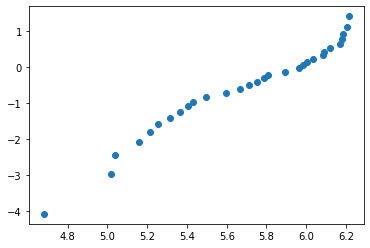

[[2.89412522]] [-17.04738504]


In [76]:
%matplotlib inline
import numpy as np
import pandas as pd

stress_array = np.array([479, 302, 327, 333, 244, 441, 404, 154, 418, 389, 496, 184, 499, 289, 486, 223, 203, 191, 214, 315, 397, 363, 438, 151, 108, 228, 174, 269, 455, 483])
dead_array = np.ones((30))
test_df = pd.DataFrame({'stress': stress_array, 'dead': dead_array})

# from lifelines import WeibullFitter
# wbf = WeibullFitter()
# wbf.fit(test_df['stress'], test_df['dead'])
# wbf.plot()
# wbf.print_summary(style = 'ascii')
# wbf.hazard_

# try the basic concept as  ln(lin(1/(1-F))) = mlnX - mln(lambda)

prepare_df = test_df.sort_values(by = 'stress')
prepare_df['accum_dead'] = prepare_df['dead'].cumsum()
failure = ['accum_dead']
prepare_df['F'] = (prepare_df[failure] -.5)/ prepare_df[failure].max()
stress = 'stress'
x_value = np.log(prepare_df[stress])
y_value = np.log(np.log(1/(1- prepare_df['F'])))

import matplotlib.pyplot as plt
plt.scatter(x = x_value, y = y_value)
plt.show()

from sklearn.linear_model import LinearRegression
x_value = np.array(x_value).reshape(len(x_value), 1)
y_value = np.array(y_value).reshape(len(y_value), 1)
lfit = LinearRegression().fit(x_value, y_value) # the coef_, intercept_ and the score is match to the youtube data. which link is: https://www.youtube.com/watch?v=dMOUlCOcP2U
print (lfit.coef_, lfit.intercept_)
lfit.score(x_value, y_value)

def deal_weibull_manually(array_data): 
    deal_df = pd.DataFrame({'stress': array_data, 'dead': np.ones((len(array_data)))})
    prepare_df = deal_df.sort_values(by = 'stress')
    prepare_df['accum_dead'] = prepare_df['dead'].cumsum()
    failure = ['accum_dead']
    prepare_df['F'] = (prepare_df[failure] -.5)/ prepare_df[failure].max()
    stress = 'stress'
    x_value = np.log(prepare_df[stress])
    y_value = np.log(np.log(1/(1- prepare_df['F'])))

    # import matplotlib.pyplot as plt
    # plt.scatter(x = x_value, y = y_value)
    # plt.show()

    from sklearn.linear_model import LinearRegression
    x_value = np.array(x_value).reshape(len(x_value), 1)
    y_value = np.array(y_value).reshape(len(y_value), 1)
    lfit = LinearRegression().fit(x_value, y_value) # the coef_, intercept_ and the score is match to the youtube data. which link is: https://www.youtube.com/watch?v=dMOUlCOcP2U
    return prepare_df, lfit.coef_, lfit.intercept_, lfit.score(x_value, y_value)

67.57640217577556 42.615404039334855
[[2.04656506]] [[6.3763112]]
<lifelines.WeibullFitter:"a_sample", fitted with 20 total observations, 0 right-censored observations>
   number of observations = 20
number of events observed = 20
           log-likelihood = -93.74
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%    z      p   -log2(p)
lambda_  66.48       6.56            53.63            79.33 9.99 <0.005      75.60
rho_      2.38       0.44             1.52             3.24 3.14 <0.005       9.20
---
AIC = 191.49

<lifelines.WeibullFitter:"b_sample", fitted with 20 total observations, 0 right-censored observations>
   number of observations = 20
number of events observed = 20
           log-likelihood = -65.93
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%     z      p   -log2(p)
lambda_  42.44       1.39            39.72            45.16 29.86 <0.

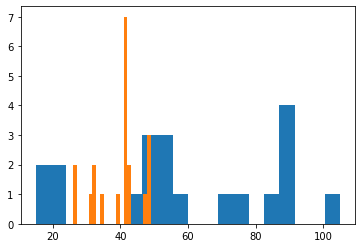

In [90]:
# two data compare
import numpy as np
import pandas as pd
a_sample = np.array([47, 50, 76, 53, 91, 15, 85, 105, 22, 16, 54, 91, 90, 57, 52, 23, 48, 69, 90, 44])
b_sample = np.array([26, 27, 31, 32, 32, 35, 39, 41, 41, 41, 42, 42, 42, 42, 43, 43, 47, 49, 49, 49])
a_sample_df, a_coef, a_inter, a_score = deal_weibull_manually(a_sample)
b_sample_df, b_coef, b_inter, b_score = deal_weibull_manually(b_sample)

import math
print (math.exp(-a_inter/a_coef), math.exp(-b_inter/b_coef))
print (a_coef, b_coef)


from lifelines import WeibullFitter
awb = WeibullFitter(label = 'a_sample')
bwb = WeibullFitter(label = 'b_sample')

awb.fit(a_sample_df['stress'], a_sample_df['dead'])
bwb.fit(b_sample_df['stress'], b_sample_df['dead'])

awb.print_summary(style = 'ascii')
bwb.print_summary(style = 'ascii')

import matplotlib.pyplot as plt
fig, axes = plt.subplots()
plt.hist(a_sample_df['stress'], bins = 20)
plt.hist(b_sample_df['stress'], bins = 20)
plt.show()
# print (awb.median_survival_time_, bwb.median_survival_time_)

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 12 total observations, 4 right-censored observations>
   number of observations = 12
number of events observed = 8
           log-likelihood = -42.40
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%     z      p   -log2(p)
lambda_ 147.92      10.35           127.64           168.20 14.20 <0.005     149.56
rho_      5.10       1.59             1.99             8.22  2.58   0.01       6.67
---
AIC = 88.81

/usr/local/lib/python3.6/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


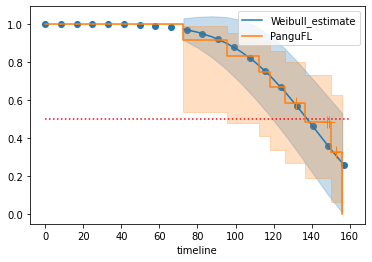

In [159]:
# actual situation

import pandas as pd

fl_name = 'results.xlsx'
df = pd.read_excel(fl_name, sheet_name = 'data')
# xl = pd.ExcelFile(fl_name)
# print (xl.sheet_names)
test = 'test_name'
unit_id = 'unit_id'
unit = 'unit'
power = 'power_change'
test_data = 'data'
dead = 'dead'
try_out = 'try out?'
# print (df.columns)
motor_life_df = df.loc[df[test] == 'motor_life', ]
motor_life_cols = [unit_id, unit, power, test_data, test, try_out]
motor_life_df = motor_life_df[motor_life_cols]
motor_life_df[dead] = 1
motor_life_df.loc[motor_life_df[try_out] == 'alive', dead] = 0
motor_life_df['project'] = 'panguFL'
pg_df = motor_life_df[[test_data, dead, 'project', 'unit']]

from lifelines import WeibullFitter
pgw = WeibullFitter()
pgw.fit(pg_df['data'], pg_df['dead'])
pgw.print_summary(style = 'ascii')
pgw.plot_survival_function()
# pgw.plot_cumulative_hazard()

# simulate
max_life = round(motor_life_df[test_data].max())+1
sim_x = np.linspace(0, max_life, num = 20)
sim_y = pgw.survival_function_at_times(sim_x)
plt.scatter(x = sim_x, y= sim_y, label = 'test')


# combine with kaplan meier
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf_pg = KaplanMeierFitter(label = 'PanguFL')
kmf_pg.fit(pg_df[test_data], pg_df[dead])
kmf_pg.plot(ci_show = True, show_censors = True)


plt.hlines(y = .5, xmin = 0, xmax = 160, color = 'r', linestyle = 'dotted')
